<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:300%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            text-align: center;"><u><b>Insurance Cost </b></u>
</div>


<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>IMPORT NEEDED LIBRARIES </b>
</div>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DATASET LOADING... </b>
</div>

In [45]:
df = pd.read_csv("insurance.csv")

<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DISPLAY A SAMPLE... </b>
</div>

In [46]:
df.sample(4)

,age,sex,bmi,children,smoker,region,charges
20,60,female,36.005,0,no,northeast,13228.84695
142,34,male,25.300,2,yes,southeast,18972.49500
1237,58,female,28.215,0,no,northwest,12224.35085
257,38,female,40.150,0,no,southeast,5400.98050


<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DATASET GENERAL INFORMATION </b>
</div>

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [48]:
structure_summary = pd.DataFrame({'Data Type': df.dtypes, 
                                  'Non-Null Count': df.count(), 
                                  'Missing Values': df.isnull().sum()})

# Create a Styler object to apply formatting
styled_summary = structure_summary.style.set_properties(**{'text-align': 'center', 'border-color': 'black', 'border-style': 'solid'})


In [49]:
styled_summary = styled_summary.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', '#f7f7f7'), ('border-color', 'black'), ('border-style', 'solid')]},
    {'selector': 'th', 'props': [('border-color', 'black'), ('border-style', 'solid')]},
    {'selector': 'td', 'props': [('border-color', 'black'), ('border-style', 'solid')]}
])

In [50]:
display(styled_summary)

,Data Type,Non-Null Count,Missing Values
age,int64,1338,0
sex,object,1338,0
bmi,float64,1338,0
children,int64,1338,0
smoker,object,1338,0
region,object,1338,0
charges,float64,1338,0


<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DATASET SUMMARY </b>
</div>

In [51]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing#'] = df.isna().sum()
    summary_df['missing%'] = (df.isna().sum())/len(df)
    summary_df['unique'] = df.nunique().values
    summary_df['count'] = df.count().values
    return summary_df

summary(df).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,unique,count
age,int64,0,0.000000,47,1338
sex,object,0,0.000000,2,1338
bmi,float64,0,0.000000,548,1338
children,int64,0,0.000000,6,1338
smoker,object,0,0.000000,2,1338
region,object,0,0.000000,4,1338
charges,float64,0,0.000000,1337,1338


<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DATA PREPROCESSING... </b>
</div>

<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>1) Sex </b>
</div>

In [52]:
# Convert 'male' to 0 and 'female' to 1
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>2) Smoker </b>
</div>

In [53]:
# Convert 'male' to 0 and 'female' to 1
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>3) Region </b>
</div>

In [55]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [57]:
value_counts = df.region.value_counts()

# Creating a Plotly table
fig = go.Figure(data=[go.Table(
    header=dict(values=['Region', 'Count']),
    cells=dict(values=[value_counts.index, value_counts.values])
)])

fig.show()

<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>USE LabelEncoder </b>
</div>

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [59]:
dfle = df
dfle.region = le.fit_transform(dfle.region)

<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DISPLAY ANOTHER SAMPLE... </b>
</div>

In [60]:
df.sample(6)

,age,sex,bmi,children,smoker,region,charges
30,22,0,35.600,0,1,3,35585.57600
83,48,1,41.230,4,0,1,11033.66170
1220,30,1,21.945,1,0,0,4718.20355
1074,60,1,18.335,0,0,0,13204.28565
7,37,1,27.740,3,0,1,7281.50560
138,54,1,31.900,3,0,2,27322.73386


<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>FEATURE SELECTION</b>
</div>

In [64]:
correlation_matrix = df.corr()

In [65]:
correlation_charges = correlation_matrix['charges']

# Displaying the correlation values in a styled format
styled_df = correlation_charges.to_frame().style.background_gradient(cmap='Blues')

styled_df

,charges
age,0.299008
sex,-0.057292
bmi,0.198341
children,0.067998
smoker,0.787251
region,-0.006208
charges,1.000000


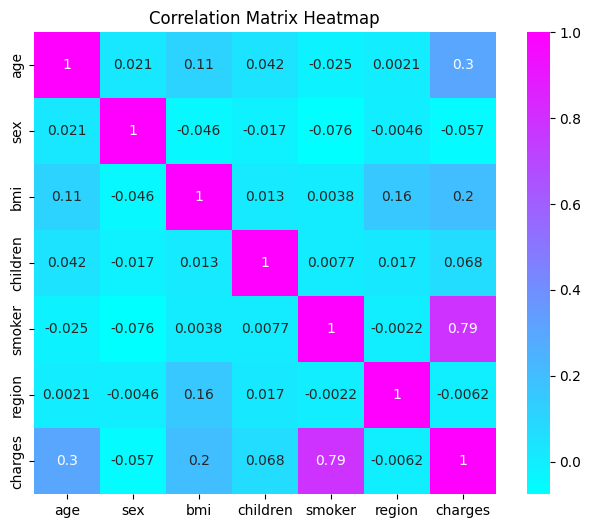

In [67]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='cool', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>Select [Smoker , Age , BMI]</b>
</div>

<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DETERMINE Predictor & Target</b>
</div>

In [70]:
x = df[['age' , "bmi" , "smoker"]]
x.sample(3)

,age,bmi,smoker
433,60,30.50,0
409,32,30.03,0
356,46,43.89,0


In [71]:
y = df['charges']
y.sample(3)

386     11856.41150
704      8930.93455
1134    19673.33573
Name: charges, dtype: float64

<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DATA SPLITING...</b>
</div>

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [75]:
display(X_train.style.set_caption('X_train'))

,age,bmi,smoker
216,53,26.600000,0
731,53,21.400000,0
866,18,37.290000,0
202,60,24.035000,0
820,45,33.700000,0
986,43,30.115000,0
776,40,32.300000,0
288,59,36.765000,1
8,37,29.830000,0
241,33,22.135000,0


In [76]:
display(y_train.to_frame().style.set_caption('y_train'))

,charges
216,10355.641000
731,10065.413000
866,1141.445100
202,13012.208650
820,7445.918000
986,8410.046850
776,6986.697000
288,47896.791350
8,6406.410700
241,5354.074650


<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>BUILDING THE MODEL </b>
</div>

In [77]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression()

<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>MODEL TRINING...</b>
</div>

In [78]:
model.fit(X_train, y_train)

LinearRegression()

<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>MODEL TRAINING ACCURACY</b>
</div>

In [79]:
model.score(X_train, y_train)

0.7449386448927938

<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>Prediction & Evaluation !</b>
</div>

In [80]:
# Predict and evaluate
y_pred = model.predict(X_test)

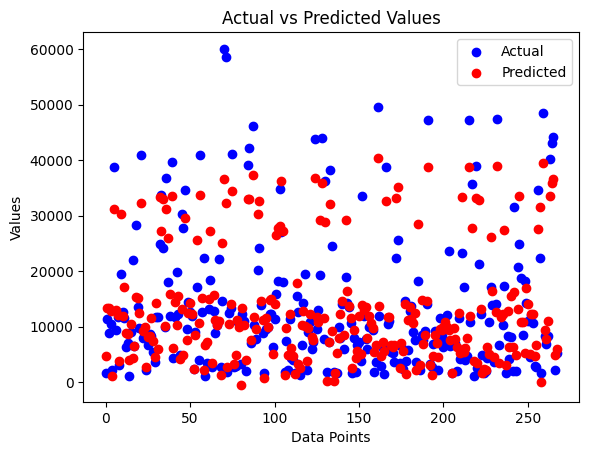

In [83]:
plt.scatter(range(len(y_test)), y_test, color='b', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='r', label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.show()

In [84]:
y_pred

array([ 4646.32706633, 13276.44498064, 13379.08177001, 12748.90925049,
        1150.63974846, 31131.51596812, 13015.87665173, 12124.05187153,
        3835.9920698 , 30261.34790018, 11926.69422536, 17098.67791787,
        8857.81885857,  8621.44351529,  4053.65538369, 10539.26455805,
        4381.05460049,  6414.32283676, 15305.1626362 , 15074.85473387,
       12500.39902534, 32286.26727543,  9275.04446059,  9965.05005151,
        2744.60500146,  8181.97471632,  8382.87578952, 11488.81906475,
        7473.93261829,  4439.95729634, 14309.8474692 ,  5942.99997287,
       33254.96673994, 27274.63783931, 32943.08001635, 10050.24907791,
       31148.62209968, 25905.58856998, 15813.73148369, 33575.35588079,
        6209.45766754, 14400.01774529, 10338.19766915, 15481.11842339,
        4134.64772026, 13159.90159588,  4838.54764711, 29532.49042785,
        7630.18148189, 12440.65499152, 14321.39586639, 12200.31555223,
        2338.59616523,  8397.20305389, 25632.29887452, 10649.14175773,
      

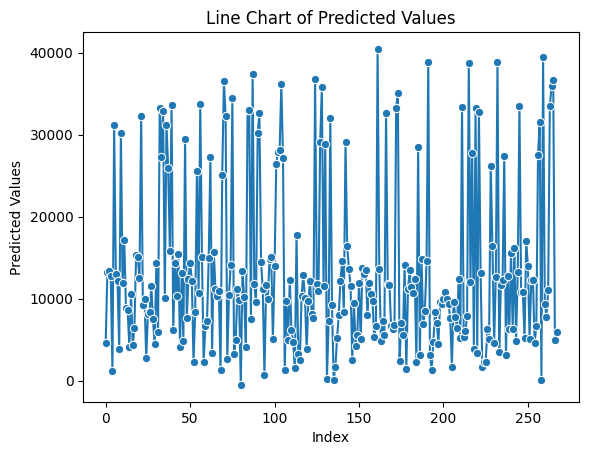

In [85]:
# Create a line plot using Seaborn
sns.lineplot(data=y_pred, marker='o')

# Set the labels and title
plt.xlabel('Index')
plt.ylabel('Predicted Values')
plt.title('Line Chart of Predicted Values')

plt.show()

<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>MODEL METRICS</b>
</div>

In [86]:
from sklearn.metrics import r2_score

In [92]:
accuracy = r2_score(y_test, y_pred)
accuracy

,Accuracy
0,0.756797


<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>FEATURES IMPORTANCE</b>
</div>

In [102]:
feature_importance = pd.Series(model.coef_, index=x.columns).abs().sort_values(ascending=False)
df_feature_importance = pd.DataFrame(feature_importance, columns=['Importance'])

# Displaying the feature importance in a styled table
feature_importance_table = df_feature_importance.style.set_caption('Feature Importance').background_gradient(cmap='Blues')
feature_importance_table

,Importance
smoker,23723.483862
bmi,303.372047
age,258.962431


In [103]:
print("Coefficient for Age:", model.coef_[0])
print("Coefficient for BMI:", model.coef_[1])
print("Coefficient for Smoker:", model.coef_[2])

Coefficient for Age: 258.9624310868775
Coefficient for BMI: 303.3720468662864
Coefficient for Smoker: 23723.48386216958


<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:300%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            text-align: center;"><u><b>THE END!</b></u>
</div>
